In [1]:
import pandas as pd
from konlpy.tag import Mecab
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [12]:
tmp = pd.read_csv("wordcloud/rr_5star.csv")
tmp.head()


,review
0,견고하고 예뻐요. 다만 미닫이 문 한쪽이 뻑뻑한데 큰 문제는 안되요. 굳굳.
1,I bought this over two years ago at the Gwangm...
2,저렴한 가격.\r\n큰 용량.\r\n가벼운 무게.\r\n심플한 디자인.\r\n사각얼...
3,액자 또는 시계 벽에 거는데 최고\r\n강추합니다 아자자
4,"컴팩트한 사이즈의 2인용 가죽소파를 찾고 있었는데, 보통은 3인용 또는 넉넉한 2인..."


In [13]:
tmp = tmp.tail(1000)
tmp = tmp.reset_index(drop=True)

In [14]:
text = []
for i in range(len(tmp)):
    if re.match(pattern='[A-z]+', string = tmp.review[i]):
        pass
    else:
        text.append(tmp.review[i])
print(len(text))
print(text[:5])

986
["편해염~뿌우'^뿌우\r\n역시 이케아 합리적인가격과 편안함을 동시에 잡았네요\r\n\r\n친구들에게 추천해주고 싶어요", '일단 세로폭이 좁아서 정말 좋아요. 공간을 적게 차지하거든요.\r\n주방이든 베란다 다용실이든 어디다 놓아도 꿀리지 않아요.\r\n단,칸을 추가할 수 있으면 좋겠어요.', '가격도 착하고 디자인도  심플하고, 튼튼해보이네요.오래 오래 사용해도 될거 같아요.\r\n이케아~~~~짱~~~^^', '아이들이갖고놀기안전하고 모양도이쁘고 만족합니다.세련된디자인과부드러운느낌의재질이 아이들에게도좋겠죠', '볼것도 많고 싸고 이쁘네요.....항상 편하게 구경하면서 살수 있고 좋네요~~ \r\n너무 좋아요~~^^']


In [5]:
stopwords = ['사용', '구매', '제품', '추천', '구입', '만족', '대비']

In [15]:
from konlpy.tag import Kkma
tagger = Kkma()
tokens = []
for text in text:
    tmp = tagger.nouns(text)
    for i in tmp:
        if i not in stopwords:
            if len(i) > 1:
                try:
                    int(i)
                except:
                    tokens.append(i)

print(tokens)

java.lang.OutOfMemoryError: java.lang.OutOfMemoryError: Java heap space

In [17]:
from PIL import Image
import numpy as np

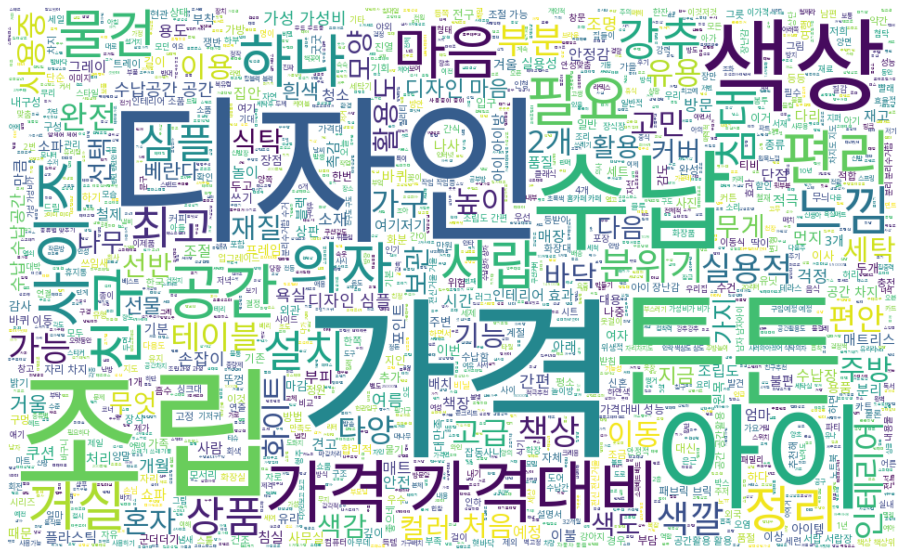

In [18]:
mask = np.array(Image.open('wordcloud/cloud.png'))

wordcloud = WordCloud(
    font_path=r'C:/Windows/Fonts/NotoIKEAKorean-Regular.ttf',
    background_color='white',
    max_words=2000,
    mask=mask,
    stopwords = {'생각', '성비', '크기', '어디', '정도', '대비'}
).generate(' '.join(tokens))
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
import matplotlib

import matplotlib.font_manager as fm

font_location = 'c:/windows/fonts/NotoIKEAKorean-Regular.ttf'
                    # ex - 'C:/asiahead4.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)
matplotlib.rcParams.update({'font.size': 22})

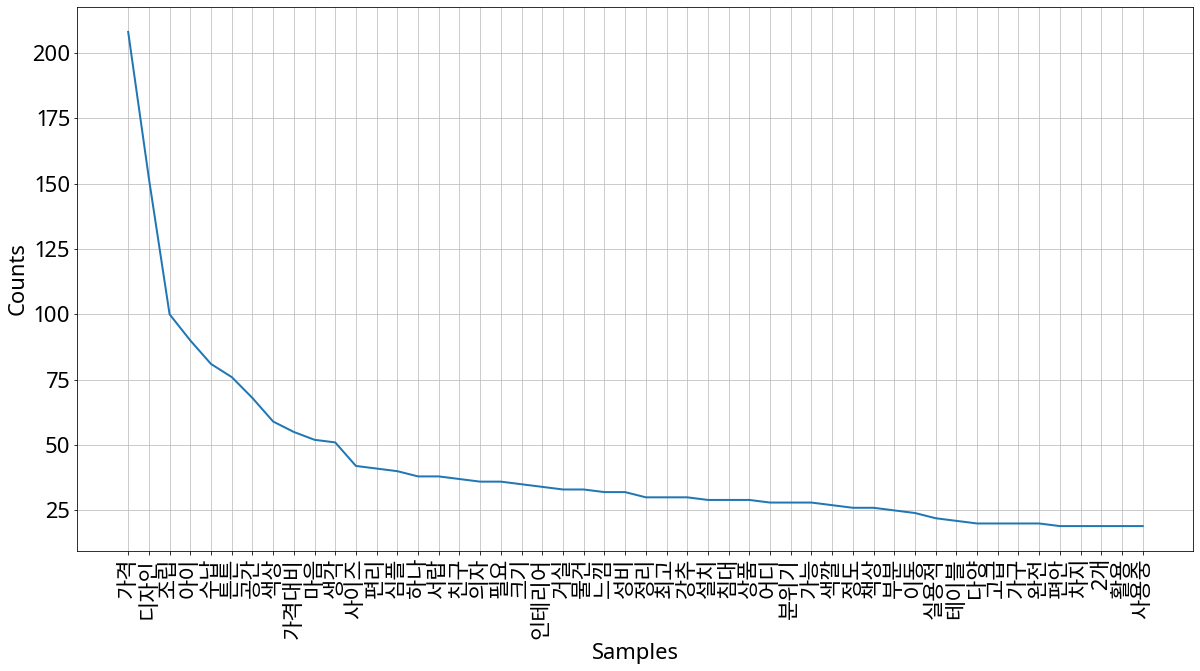

In [19]:
import nltk

plt.figure(figsize=(20,10))
words = nltk.Text(tokens, name='단어 빈도수')
words.plot(50) # 50개만
plt.show()